In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('car data.csv')
data.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Transmission', 'First Owner', 'Selling_Price'],
      dtype='object')

In [14]:
df = pd.DataFrame(data)
df=df.dropna()
df=df.drop('Car_Name',axis=1)
df=pd.get_dummies(df)
df.replace([False,True],[0,1],inplace=True)
df

C:\Users\Afan Pc\AppData\Local\Temp\ipykernel_1220\257665330.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([False,True],[0,1],inplace=True)


,Year,Present_Price,Kms_Driven,Selling_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,First Owner_First Owner,First Owner_Fourth & Above Owner,First Owner_Second Owner,First Owner_Third Owner
0,2014.0,5.59,27000.0,3.35,0,0,1,0,1,0,0,1,0
1,2013.0,9.54,43000.0,4.75,0,1,0,0,1,0,0,0,1
2,2017.0,9.85,6900.0,7.25,0,0,1,0,1,1,0,0,0
3,2011.0,4.15,5200.0,2.85,0,0,1,0,1,1,0,0,0
4,2014.0,6.87,42450.0,4.60,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016.0,11.60,33988.0,9.50,0,1,0,0,1,1,0,0,0
297,2015.0,5.90,60000.0,4.00,0,0,1,0,1,1,0,0,0
298,2009.0,11.00,87934.0,3.35,0,0,1,0,1,1,0,0,0
299,2017.0,12.50,9000.0,11.50,0,1,0,0,1,1,0,0,0


In [20]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']
# print(x)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3.1765775235817513


In [25]:
import seaborn as sns

In [48]:
trainpred=model.predict(X_train)
testpred=model.predict(X_test)

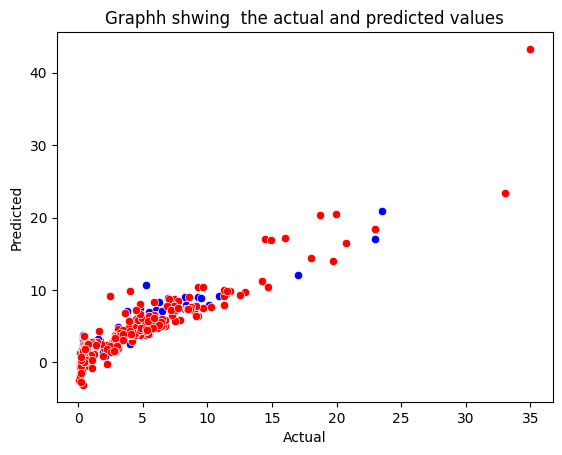

In [50]:
# sns.scatterplot(x=y_test,y=y_pred,color='blue')
sns.scatterplot(x=y_test,y=testpred,color='blue')
sns.scatterplot(x=y_train,y=trainpred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Graphh shwing  the actual and predicted values')



# sns.scatterplot(x=y_test,y=y_test,color='red')

plt.show()